In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('WineQT.csv') #load data-set

In [3]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

<Axes: >

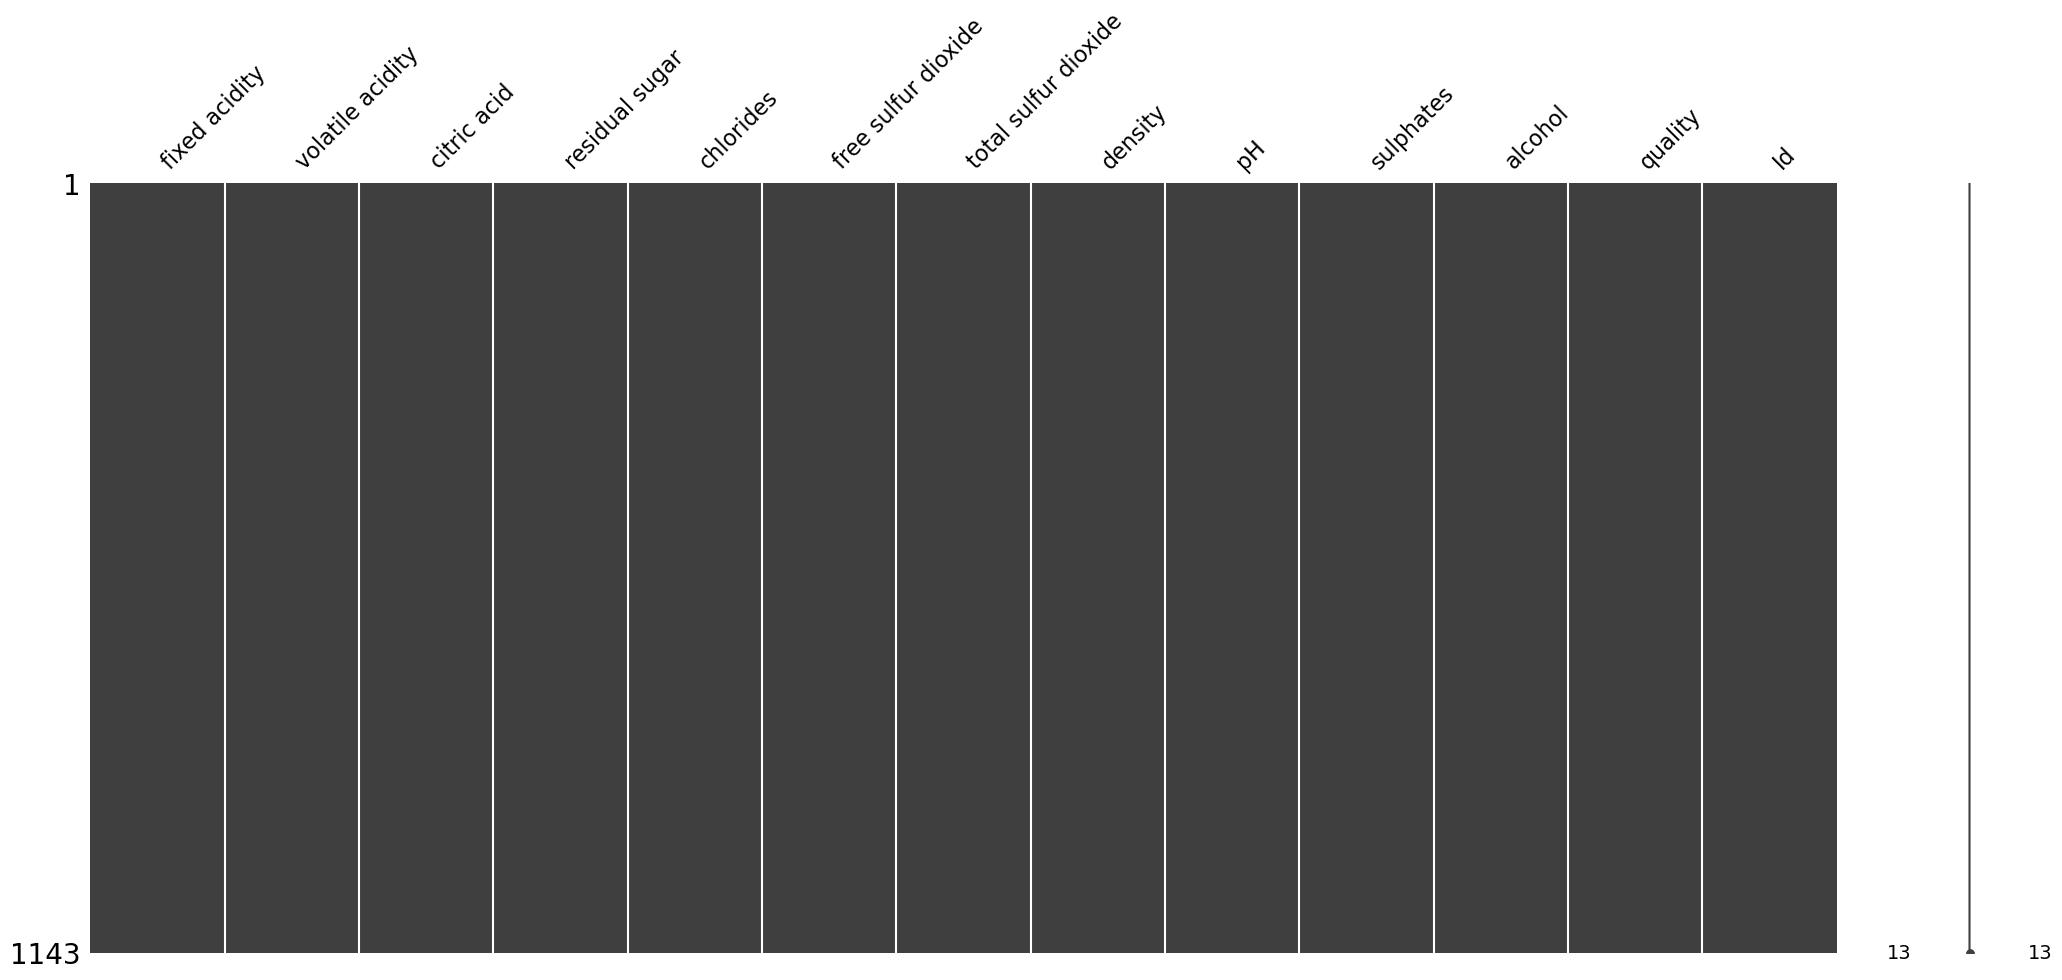

In [4]:
msno.matrix(df)

In [5]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
columns_with_missing_values

Series([], dtype: int64)

In [6]:
#As there is no missing values in the data-set
#But if there was missing values in the data-set then we can use imputation like
#mean_value = df['fixed acidity'].mean()
#df['fixed acidity'].fillna(mean_value, inplace=True)

#for removal we can use 
#df.dropna(subset=['fixed-acidity'], inplace=True)

In [7]:
df_encoded = pd.get_dummies(df, columns=['fixed acidity'])

In [8]:
df_encoded.head()

volatile acidity  citric acid  residual sugar  chlorides  \
0              0.70         0.00             1.9      0.076   
1              0.88         0.00             2.6      0.098   
2              0.76         0.04             2.3      0.092   
3              0.28         0.56             1.9      0.075   
4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  ...  fixed acidity_13.3  fixed acidity_13.4  fixed acidity_13.5  \
0      9.4  ...               False               False               False   
1      9.8  ...               False               False               False   
2      9.8  ...               False               False               False   
3      9.8  ...               False               False               False   
4      9.4  ...               False               False               False   

   fixed acidity_13.7  fixed acidity_13.8  fixed acidity_14.3  \
0               False               False               False   
1               False               False               False   
2               False               False               False   
3               False               False               False   
4               False               False               False   

   fixed acidity_15.0  fixed acidity_15.5  fixed acidity_15.6  \
0               False               False               False   
1               False               False               False   
2               False               False               False   
3               False               False               False   
4               False               False               False   

   fixed acidity_15.9  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 103 columns]

In [9]:
#Normalization
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[['fixed acidity', 'volatile acidity']]), 
                              columns=['citric acid', 'chlorides'])

In [10]:
df_normalized.head()

citric acid  chlorides
0     0.247788   0.397260
1     0.283186   0.520548
2     0.283186   0.438356
3     0.584071   0.109589
4     0.247788   0.397260

In [15]:
#Split the data into training and testing set


# Extract features and target variable
X = df[['pH', 'density', 'sulphates']]
y = df['residual sugar']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (914, 3) (914,)
Testing set shape: (229, 3) (229,)
